In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [26]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.57MB/s]


In [27]:
!unzip \*.zip  && rm *.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [29]:
df = pd.read_csv("Mall_Customers.csv",index_col = 0)
df.head(20)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [31]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [33]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [34]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)


In [42]:
pca = PCA(n_components = 4)
pca.fit(df_std)
pca.components_

array([[ 0.23430156,  0.68790025, -0.00608217, -0.68691996],
       [ 0.62688553, -0.10368955,  0.7652519 ,  0.10321115],
       [-0.74300906,  0.12238438,  0.64366712, -0.13657317],
       [ 0.00740532, -0.70785859, -0.00672133, -0.70628337]])

In [ ]:

pca.transform(df_std)
scores_pca = pca.transform(df_std)
scores_pca

In [70]:
df_std = pd.DataFrame(data = df_std,columns = df.columns)
df_std.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


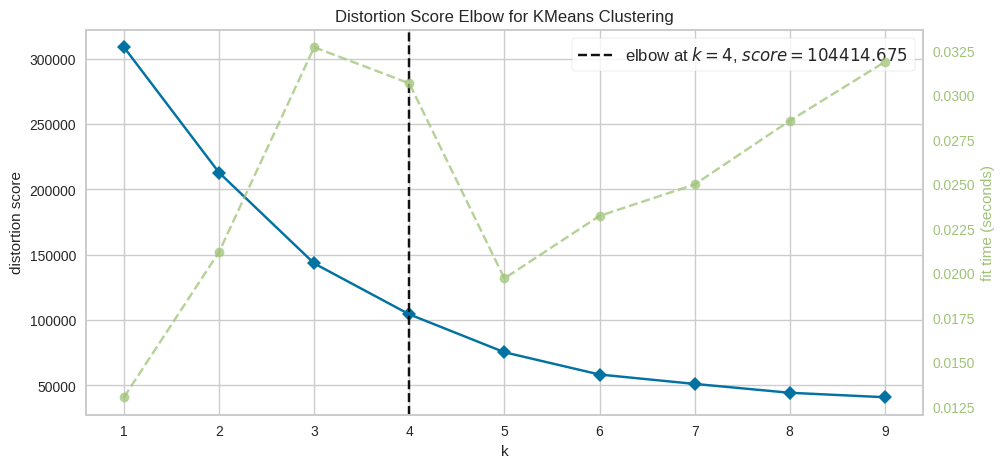

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500),n_init='auto')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

In [71]:
kmeans = KMeans(n_clusters = 3, init='k-means++',random_state=42)
kmeans.fit(df)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(df, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.383798873822341


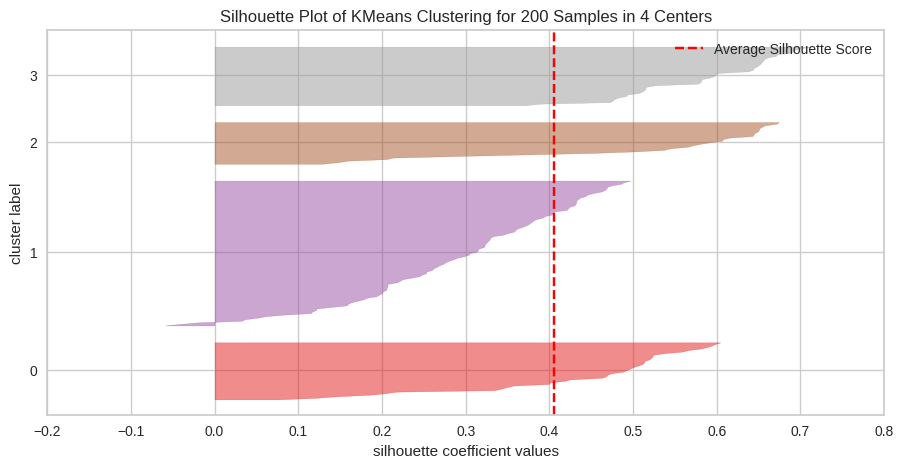

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(kmeans1,size=(1080, 500))

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.show()

In [47]:
kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42)
kmeans.fit(df)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(df, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.4052954330641215


In [48]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)


In [49]:
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [72]:
# Orijinal özelliklere sahip yeni bir veri çerçevesi oluşturup, her noktaya atanmış kümelerin bulunduğu yeni bir sütun ekliyoruz.
df_segm_kmeans= df_std.copy()
df_std[" Segment K-means"] = kmeans.labels_

df_segm_kmeans

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [51]:
df_segm_analysis = df_std.groupby([' Segment K-means']).mean()
df_segm_analysis


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Segment K-means,,,,
0,1.128152,0.759830,0.070868,-0.814929
1,-0.886405,-0.747192,-0.034098,0.678764
2,-0.886405,0.664494,-0.066484,-0.598558
3,1.128152,-0.760727,0.054964,0.833693


In [73]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i,n_init=10, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

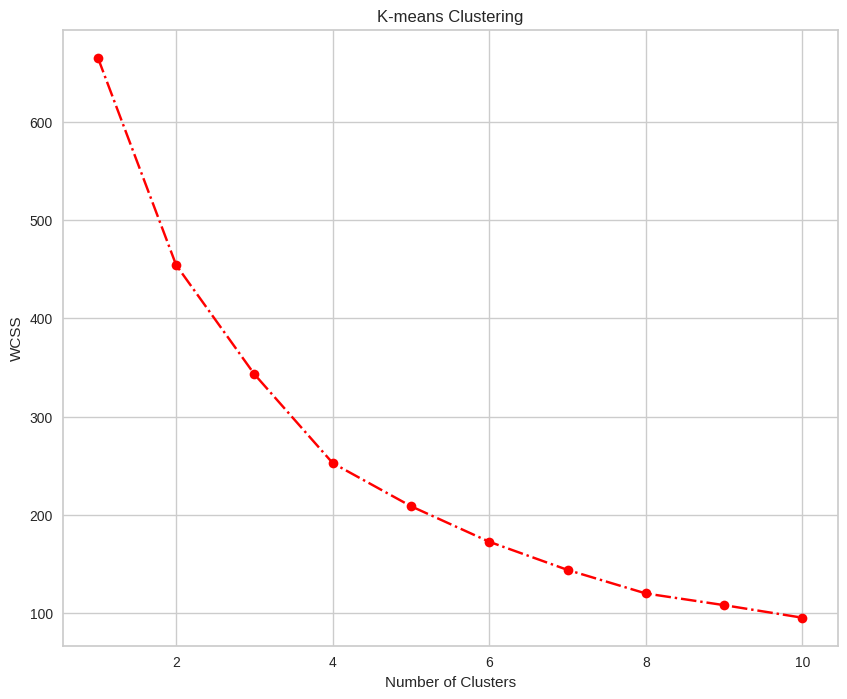

In [74]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [55]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [82]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Gender,Age,Annual Income (k$),Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,1,19,15,39,-0.406383,-0.520714,-2.072527,5
1,1,21,15,81,-1.427673,-0.367310,-2.277644,5
2,0,20,16,6,0.050761,-1.894068,-0.367375,7
3,0,23,16,77,-1.694513,-1.631908,-0.717467,8
4,0,31,17,40,-0.313108,-1.810483,-0.426460,7


In [83]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Gender,Age,Annual Income (k$),Component 1,Component 2,Component 3,Component 4
Segment K-means PCA,,,,,,,
0,1.0,56.535714,46.178571,40.035714,1.411835,0.114818,-0.982329
1,0.0,47.166667,87.777778,25.555556,0.853776,0.078702,1.531015
2,0.0,31.677419,57.741935,48.129032,-0.505903,-0.592912,0.537354
3,1.0,39.894737,82.421053,13.842105,1.280397,1.192313,-0.099191
4,1.0,30.400000,120.000000,68.000000,-0.641312,2.577620,0.453526
5,1.0,23.785714,30.785714,69.357143,-0.983328,0.026398,-1.803616
6,0.0,32.190476,86.047619,81.666667,-1.381504,0.364437,1.059470
7,0.0,49.275862,38.793103,36.448276,0.678796,-1.324153,0.288312
8,0.0,25.461538,25.692308,80.538462,-1.669602,-1.352943,-0.476483


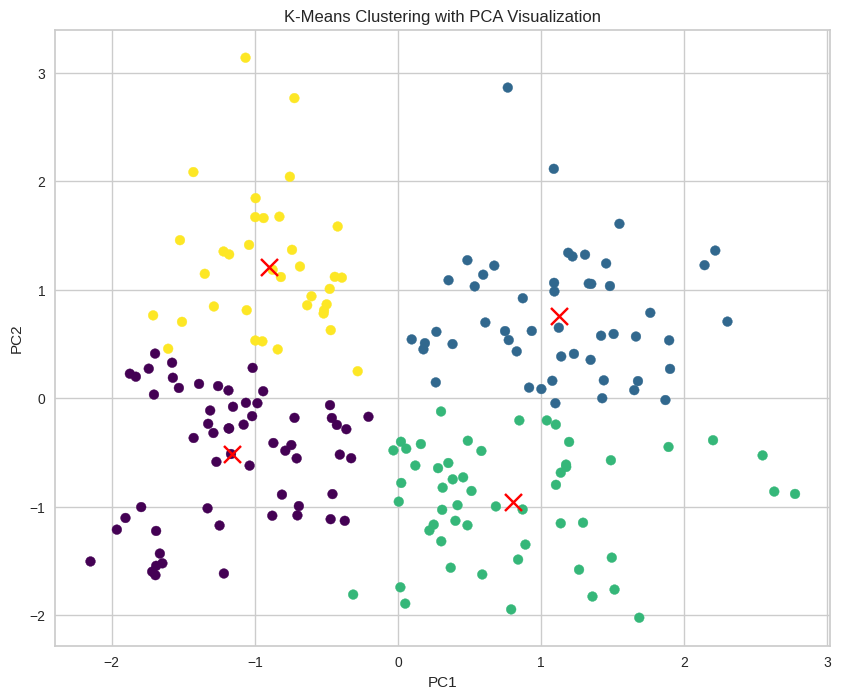

In [106]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a PCA instance
pca = PCA(n_components=2)

# Reduce dimensionality of the data
reduced_data = pca.fit_transform(df_std)

# Create a KMeans instance
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model to the reduced data
kmeans.fit(reduced_data)

# Create a scatter plot of the data points, colored by their cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')

# Add cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=150)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with PCA Visualization')

# Show the plot
plt.show()